# Exploratory Data Analysis 
## Lung Cancer in Singapore
This EDA explores the lung cancer dataset and consists of five parts: 
1. Importing Relevant Packages 
2. Importing Data 
3. High Level Data Overview 
4. Data Cleaning 
5. Data Preprocessing
6. Data Visualisation 
7. Conclusion

The aim of this EDA is to get a better understanding of the data and prepare the data before creating for the machine learning models which will predict whether a patient will be diagnosed with lung cancer.

## 1. Importing Relevant Packages
Throughout this EDA, we will use: 
- sqlite3 to interact with the lung_cancer.db database
- pandas for data manipulation and analysis 
- seaborn for data visualisations 
- matplotlib.pyplot for data visualisations 

In [84]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing Data
To connect to the lung_cancer.db database, we will use the sqlite3 package. We will query the dataset to identify the table(s) present in the file.

In [85]:
# Connect to the database
conn = sqlite3.connect('data/lung_cancer.db')

# Query to get a list of tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query and load the result into a DataFrame
tables_df = pd.read_sql_query(tables_query, conn)

# Display the list of tables
print(tables_df)

          name
0  lung_cancer


Once we have identified the table name within the database, we can query with the actual table name and load the data into a pandas DataFrame, displaying the first few rows of the DataFrame using the .head() method. 

In [86]:
# Query with actual table name
query = "SELECT * FROM lung_cancer"

# Load data into a DataFrame
df = pd.read_sql_query(query, conn)

# Display the first few rows of the DataFrame
print(df.head())

# Close the connection
conn.close()

             ID  Age Gender COPD History Genetic Markers  \
0  1.468154e+16   42   Male           No     Not Present   
1  1.271684e+18   72   Male          Yes     Not Present   
2  1.708068e+18   65   Male          Yes     Not Present   
3  3.555829e+17   67   Male           No     Not Present   
4  1.684598e+18   54   Male          Yes     Not Present   

  Air Pollution Exposure  Last Weight  Current Weight Start Smoking  \
0                 Medium           73              69          2015   
1                   High           50              42          2006   
2                    Low           65              75          1998   
3                   High           69              58          2011   
4                 Medium           46              40          1994   

    Stop Smoking Taken Bronchodilators Frequency of Tiredness Dominant Hand  \
0           2020                    No             None / Low         Right   
1           2012                   Yes                

## 3. High Level Data Overview
Here we are using the .info() method to get a quick overview of the columns, how many data entries there are, what the data type of each column is, and where there are missing values. 

Additionally, we are using the .describe() method to attain descriptive statistics of the numerical columns. 

In [87]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10348 non-null  float64
 1   Age                     10348 non-null  int64  
 2   Gender                  10348 non-null  object 
 3   COPD History            9236 non-null   object 
 4   Genetic Markers         10348 non-null  object 
 5   Air Pollution Exposure  10345 non-null  object 
 6   Last Weight             10348 non-null  int64  
 7   Current Weight          10348 non-null  int64  
 8   Start Smoking           10348 non-null  object 
 9   Stop Smoking            10348 non-null  object 
 10  Taken Bronchodilators   9287 non-null   object 
 11  Frequency of Tiredness  10348 non-null  object 
 12  Dominant Hand           10348 non-null  object 
 13  Lung Cancer Occurrence  10348 non-null  int64  
dtypes: float64(1), int64(4), object(9)
mem

## 4. Data Cleaning 
In this section of the EDA, we will be cleaning the data to remove errors, inconsistencies, and outliers to prevent misleading results and conclusions from our machine learning models as we move forward. 

This will be done through: 
- Removing duplicate rows 
- Removing missing values (that make up <5% of the data)
- Converting inconsistent data types 
- Fixing inconsistent data
- Reviewing data cleaning results

- Removing duplicate rows 

Duplicate rows are removed from the original DataFrame (df), keeping only the first occurence of each unique row. The resulting DataFrame (df_clean) will be used going forward to store our cleaned dataset.

In [88]:
# Removing duplicate rows 
df_clean = df.drop_duplicates()
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9997
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      9998 non-null   float64
 1   Age                     9998 non-null   int64  
 2   Gender                  9998 non-null   object 
 3   COPD History            8917 non-null   object 
 4   Genetic Markers         9998 non-null   object 
 5   Air Pollution Exposure  9995 non-null   object 
 6   Last Weight             9998 non-null   int64  
 7   Current Weight          9998 non-null   int64  
 8   Start Smoking           9998 non-null   object 
 9   Stop Smoking            9998 non-null   object 
 10  Taken Bronchodilators   8971 non-null   object 
 11  Frequency of Tiredness  9998 non-null   object 
 12  Dominant Hand           9998 non-null   object 
 13  Lung Cancer Occurrence  9998 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usa

- Removing missing values (that make up <5% of the data)

We are using df_clean.isna().sum() to gain an overview of which columns contain missing values and how many missing values there are in each column.

We then drop rows where the columns with fewer missing values than the identified threshold (less than or equal to 5% of the DataFrame's length) are missing values. Then, df_clean.isna().sum() is used once more to view the remaining missing values in the dataset.

In [89]:
# Missing values overview
print(df_clean.isna().sum())

ID                           0
Age                          0
Gender                       0
COPD History              1081
Genetic Markers              0
Air Pollution Exposure       3
Last Weight                  0
Current Weight               0
Start Smoking                0
Stop Smoking                 0
Taken Bronchodilators     1027
Frequency of Tiredness       0
Dominant Hand                0
Lung Cancer Occurrence       0
dtype: int64


In [90]:
# Drop missing values (5% or less of total values)
threshold = len(df) * 0.05 
cols_to_drop = df_clean.columns[df_clean.isna().sum() <= threshold]
df_clean = df_clean.dropna(subset = cols_to_drop)

print(df_clean.isna().sum())

ID                           0
Age                          0
Gender                       0
COPD History              1080
Genetic Markers              0
Air Pollution Exposure       0
Last Weight                  0
Current Weight               0
Start Smoking                0
Stop Smoking                 0
Taken Bronchodilators     1026
Frequency of Tiredness       0
Dominant Hand                0
Lung Cancer Occurrence       0
dtype: int64


- Converting inconsistent data types 

df_clean.info() previously showed us the datatypes of values in each column. Here, we convert the 'ID' column, which was previously of float datatype, into a column of int datatype.

In [91]:
# Convert 'ID' column to int
df_clean['ID'] = df_clean['ID'].astype('int64')

- Fixing inconsistent data 

The categorical value columns in the dataset feature some strings which are both upper and lowercase. Hence, we convert all strings to lowercase to make the dataset easier to work with. 

Additionally, df_clean['Gender'].unique() shows us that the 'Gender' column has further inconsistencies (ie. a value with a 'NAN' string), so we drop this row from the dataset.

In [92]:
# Convert all strings to lowercase 
df_clean = df_clean.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

# Remove rows with 'nan' string from 'Gender' column
df_clean = df_clean.drop(df_clean[df_clean['Gender'].str.contains('nan', na = False)].index)

- Reviewing data cleaning results 

Upon completing the data cleaning process, we can print df_clean.info() once more. This shows us that the DataFrame has now reduced in size due to duplicates and inconsistencies being removed. 

It is important to note that there are still null entries in the 'COPD History' and 'Taken Bronchodilators' columns, which will be dealt with appropriately in the next section.

In [93]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9997
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      9994 non-null   int64 
 1   Age                     9994 non-null   int64 
 2   Gender                  9994 non-null   object
 3   COPD History            8914 non-null   object
 4   Genetic Markers         9994 non-null   object
 5   Air Pollution Exposure  9994 non-null   object
 6   Last Weight             9994 non-null   int64 
 7   Current Weight          9994 non-null   int64 
 8   Start Smoking           9994 non-null   object
 9   Stop Smoking            9994 non-null   object
 10  Taken Bronchodilators   8968 non-null   object
 11  Frequency of Tiredness  9994 non-null   object
 12  Dominant Hand           9994 non-null   object
 13  Lung Cancer Occurrence  9994 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 1.1+ MB
None


## 5. Data Preprocessing 

In this section, we will preprocess the data in order to remove further inconsistencies and feature engineer new columns out of categorical values. This will include: 
- Imputing missing values 
- Encoding categorical values 
- Transforming numeric values
- Handling outliers 
- Finalising data

- Imputing missing values 

Here, we will deal with the existing missing values in the 'COPD History' and 'Taken Bronchodilators' columns. Both columns have around 1000 missing values, which may affect the performance of the machine learning model in the future. However, upon further research, links between COPD history, bronchodilators, and lung cancer occurrence have been established. Hence, it would be unwise to drop both columns from the dataset. 

The best course of action would be to impute missing values with another value. These missing values are thereby imputed with 'no', indicating an absence of COPD history and taking bronchodilators. Though we do not know whether this is true of all missing values, it is safer to assume that individuals do not have a history of COPD and have not taken bronchodilators to avoid drawing an incorrect positive correlation between these two columns and lung cancer occurence. 

In [94]:
# Imputing missing values for 'COPD History' and 'Taken Bronchodilators' 
# NaN values are converted into 'no'

df_clean.fillna('no', inplace = True)

- Encoding categorical values 

Now that are no more null values in the dataset, we can encode categorical values to binary values (0, 1, 2) to feature engineer new columns which can then be fed into the machine learning models. 

In [95]:
# Encoding categorical values

# Encoding 'Gender' column to 'Male' 
df_clean['Male'] = df_clean['Gender'].apply(lambda val:1 if val == 'male' else 0)

# Encoding 'COPD History' column 
df_clean['COPDHistory'] = df_clean['COPD History'].apply(lambda val:1 if val == 'yes' else 0)

# Encoding 'Genetic Markers' column 
df_clean['GeneticMarkers'] = df_clean['Genetic Markers'].apply(lambda val:1 if val == 'present' else 0)

# Encoding 'Air Pollution Exposure' column 
ape_mapping = {'low':0, 'medium':1, 'high':2}
df_clean['AirPollutionExposure'] = df_clean['Air Pollution Exposure'].map(ape_mapping)

# Encoding 'Taken Bronchodilators' column 
df_clean['TakenBronchodilators'] = df_clean['Taken Bronchodilators'].apply(lambda val:1 if val == 'yes' else 0)

# Encoding 'Frequency of Tiredness' column 
fot_mapping = {'none / low':0, 'medium':1, 'high':2}
df_clean['FrequencyOfTiredness'] = df_clean['Frequency of Tiredness'].map(fot_mapping)

# Encoding 'Dominant Hand' column
df_clean['RightHanded'] = df_clean['Dominant Hand'].apply(lambda val:0 if val == 'left' else 1)

- Transforming numeric values 

We can feature engineer new columns out of existing numeric value columns to make the data more concise. 

In [96]:
# Transforming numeric values 

# Transforming 'Last Weight' and 'Current Weight' into 'WeightChange' 
df_clean['WeightChange'] = df_clean['Current Weight'] - df_clean['Last Weight']

# Encoding 'Start Smoking' column to 'Smoker'
df_clean['Smoker'] = df_clean['Start Smoking'].apply(lambda val:0 if val == 'not applicable' else 1)

# Transforming 'still smoking' in 'Stop Smoking' column into '2024'
# 2024 is most recent value in 'Stop Smoking' column
df_clean['StopSmoking'] = df_clean['Stop Smoking'].apply(lambda val:2024 if val == 'still smoking' else val)

# Transforming 'not applicable' in 'Start Smoking' and 'Stop Smoking' to 0
df_clean['StopSmoking'] = df_clean['StopSmoking'].apply(lambda val:0 if val == 'not applicable' else val)
df_clean['StartSmoking'] = df_clean['Start Smoking'].apply(lambda val:0 if val == 'not applicable' else val)

# Transforming 'Start Smoking' and 'Stop Smoking' into 'Years Smoking'
df_clean['StartSmoking'] = df_clean['StartSmoking'].astype('int64')
df_clean['StopSmoking'] = df_clean['StopSmoking'].astype('int64')
df_clean['YearsSmoking'] = df_clean['StopSmoking'] - df_clean['StartSmoking']

- Handling outliers in 'WeightChange' and 'YearsSmoking'

We can identify outliers in the numerical value columns 'WeightChange' and 'YearsSmoking' based on if the value is outside of the thresholds: 
- 25th percentile - 1.5 * interquartile range 
- 75th percentile + 1.5 * interquartile range 

In [97]:
# Handling outliers in 'WeightChange' and 'YearsSmoking'

# 'WeightChange' column 
# Identifying 25th and 75th percentile 
weightchange_25 = df_clean['WeightChange'].quantile(0.25)
weightchange_75 = df_clean['WeightChange'].quantile(0.75)
weightchange_iqr = weightchange_75 - weightchange_25 

# Identifying thresholds 
wc_lower = weightchange_25 - (1.5 * weightchange_iqr)
wc_upper = weightchange_75 + (1.5 * weightchange_iqr)

# Outliers in 'WeightChange'
print(df_clean[(df_clean['WeightChange'] < wc_lower) | (df_clean['WeightChange'] > wc_upper)])

# 'YearsSmoking' column
# Identifying 25th and 75th percentile 
yearssmoking_25 = df_clean['YearsSmoking'].quantile(0.25)
yearssmoking_75 = df_clean['YearsSmoking'].quantile(0.75)
yearssmoking_iqr = yearssmoking_75 - yearssmoking_25 

# Identifying thresholds 
ys_lower = yearssmoking_25 - (1.5 * yearssmoking_iqr)
ys_upper = yearssmoking_75 + (1.5 * yearssmoking_iqr)

# Outliers in 'YearsSmoking'
print(df_clean[(df_clean['YearsSmoking'] < ys_lower) | (df_clean['YearsSmoking'] > ys_upper)][['Age', 'YearsSmoking']])

Empty DataFrame
Columns: [ID, Age, Gender, COPD History, Genetic Markers, Air Pollution Exposure, Last Weight, Current Weight, Start Smoking, Stop Smoking, Taken Bronchodilators, Frequency of Tiredness, Dominant Hand, Lung Cancer Occurrence, Male, COPDHistory, GeneticMarkers, AirPollutionExposure, TakenBronchodilators, FrequencyOfTiredness, RightHanded, WeightChange, Smoker, StopSmoking, StartSmoking, YearsSmoking]
Index: []

[0 rows x 26 columns]
      Age  YearsSmoking
8      67            65
128    89            71
139    89            66
142    85            72
145    86            64
...   ...           ...
9707   89            75
9818   86            65
9823  107            78
9839   70            69
9947   89            79

[203 rows x 2 columns]


Upon identifying outliers in the 'WeightChange' and 'YearsSmoking' columns, we see that there are no outliers in the 'WeightChange' column, hence we do not need to remove any entries. 

However, the 'YearsSmoking' column has 203 rows of outliers that are out of the identified threshold. When printing these outlying values with the 'Age' column, we can still see that the 'YearsSmoking' column contains values less than the 'Age' column, which is to be expected. Furthermore, 'YearsSmoking' is a value that can vary greatly depending on the individual (as opposed to 'WeightChange'), hence it would be unwise to remove outlying data in this scenario. 

- Handling outliers in the 'Age' column

We can handle further outliers in the 'Age' column. When looking at the initial high level overview from df.describe(), we see that the minimum value for the 'Age' column is negative. This is not possible and is likely due to human input error. Therefore, negative 'Age' values are converted to positive. 

The same thresholds are then used to identify outliers in the 'Age' column. 

In [98]:
# Handling outliers in 'Age'

# The dataset features rows where the 'Age' column is negative 
# This could be an input error, hence these values are changed to positive

df_clean['Age New'] = df_clean['Age'].apply(lambda val:-val if val <0 else val)

# 'Age New' column
# Identifying 25th and 75th percentile 
age_25 = df_clean['Age New'].quantile(0.25)
age_75 = df_clean['Age New'].quantile(0.75)
age_iqr = age_75 - age_25 

# Identifying thresholds 
age_lower = age_25 - (1.5 * age_iqr)
age_upper = age_75 + (1.5 * age_iqr)

# Outliers in 'YearsSmoking'
print(df_clean[(df_clean['Age New'] < age_lower) | 
         (df_clean['Age New'] > age_upper)])

                       ID  Age  Gender COPD History Genetic Markers  \
51    1584852605801974016  110    male           no         present   
60     100147504494622960   18    male          yes     not present   
182    278656080966966016   22    male           no     not present   
205   2112223543321654272   21    male          yes     not present   
434   1375736119451618048   22    male          yes     not present   
465    880966167531436160   21    male          yes     not present   
920   2269336431315672064  106    male           no     not present   
1141   905673218631248384  105    male           no     not present   
1284   297572560529827840  108    male          yes     not present   
1287  1359326517697095168   20    male          yes     not present   
2073  1542476249822458880  110    male           no         present   
2255  1289426475130723584   22    male          yes         present   
2485   951284632560185984   20    male          yes     not present   
2958  

Here we see 33 rows where age is of an outlying value. Inspecting these results shows us that these ages are still within the realm of possibility, by inspecting them against the 'YearsSmoking' column. Hence all values of age are kept within the dataset to avoid losing valuable data and no rows of data are removed. 

- Finalising data 

Upon the completion of imputing missing values, encoding categorical values, transforming numeric values, and handling outliers, we can finalise the dataset that we will use for data visualisations and machine learning models. We create a new DataFrame, df_final, to store the columns we wish to keep out of those from the original dataset and those that we have feature engineered. We also rename columns to standardise naming conventions.

In [103]:
# Finalising data 

# Selecting columns from df_clean to keep
df_final = df_clean[['Age New', 'Male', 'COPDHistory', 'GeneticMarkers', 'AirPollutionExposure', 'WeightChange', 'Smoker', 
                     'YearsSmoking', 'TakenBronchodilators', 'FrequencyOfTiredness', 'RightHanded', 'Lung Cancer Occurrence']].copy()

# Renaming columns
df_final.rename(columns = {'Age New': 'Age', 'Lung Cancer Occurrence': 'LungCancerOccurrence'}, inplace = True)

# Previewing the final data
df_final.head()

,Age,Male,COPDHistory,GeneticMarkers,AirPollutionExposure,WeightChange,Smoker,YearsSmoking,TakenBronchodilators,FrequencyOfTiredness,RightHanded,LungCancerOccurrence
0,42,1,0,0,1,-4,1,5,0,0,1,1
1,72,1,1,0,2,-8,1,6,1,1,1,1
2,65,1,1,0,0,10,1,26,1,0,1,0
3,67,1,0,0,2,-11,1,3,0,0,1,1
4,54,1,1,0,1,-6,1,23,1,0,1,0


## 6. Data Visualisation 
We use data visualisations of df_final to draw meaningful inference from the cleaned dataset. This will be achieved through using the following: 
- Correlation heatmap 
- Distribution plots 
- Categorical plots
- Scatter plots

- Correlation heatmap 

This visually represents the correlation between all variables in the df_final dataset. The colours indicate the strength and direction of the relationship between pairs of variables. The heatmap is able to give us an overview of potential relationships between variables that we may want to explore. 

Annotations are further added to show the value of the correlation: 
- 1: perfect positive correlation 
- 0: no correlation
- -1: perfect negative correlation 

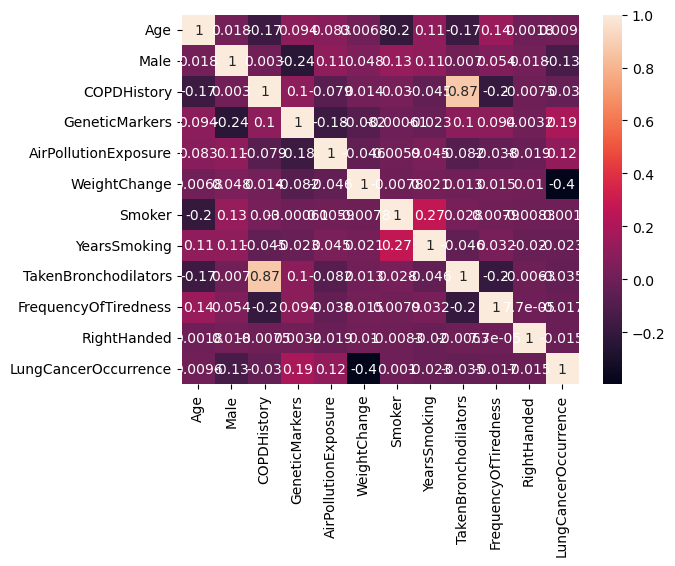

In [104]:
# Correlation heatmap
sns.heatmap(df_final.corr(), annot = True)
plt.show()

- 'COPDHistory' and 'TakenBronchodilators' Correlation 

From the correlation heatmap, we can see that most columns have weak to moderate correlations with one another. The exception to this is 'COPDHistory' and 'TakenBronchodilators', which are highly positively correlated at 0.87. This correlation can be explained as bronchodilators are a common treatment used to alleviate the symptoms of COPD (Chronic Obstructive Pulmonary Disease). 

Source: https://www.news-medical.net/health/History-of-Chronic-Obstructive-Pulmonary-Disease.aspx#:~:text=Earlier%20the%20only%20therapies%20for,beta%202%20agonist%20was%20used.


- 'COPDHistory' and 'LungCancerOccurrence' Correlation 

Existing academic research also shows that COPD is linked to an increased risk of lung cancer, but this is not reflected in the correlation heatmap as 'COPDHistory' and 'LungCancerOccurence' are weakly correlated at 0.03. Although this is unexpected, it may be reflective of the quality of healthcare in Singapore as COPD patients may receive prompt access to treatment, as shown by the high correlation discussed between 'COPDHistory' and 'TakenBronchodilators'.  

Source: https://jtd.amegroups.org/article/view/32741/22937#:~:text=The%20presence%20of%20emphysema%20has,sex%20(12%2C19).

- 'WeightChange' and 'LungCancerOccurrence' Correlation 

'WeightChange' and 'LungCancerOccurrence' have a moderate negative relationship, as described by a correlation of -0.4. This could be explained by the fact that about 60% of people with lung cancer have a loss of apetite and significant weight loss at the time of diagnosis. Though increased weight loss is a side effect of lung cancer, it could also be an early sympton of lung cancer and investigating this correlation could lead to earlier diagnoses for lung cancer patients and better odds of survival. 

Source: https://www.cancerresearchuk.org/about-cancer/coping/physically/diet-problems/types/weight-loss

- Distribution plots 

Distribution plots can provide a visual representation of single continuous variables, specifically 'Age', 'YearsSmoking', and 'WeightChange'. 

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


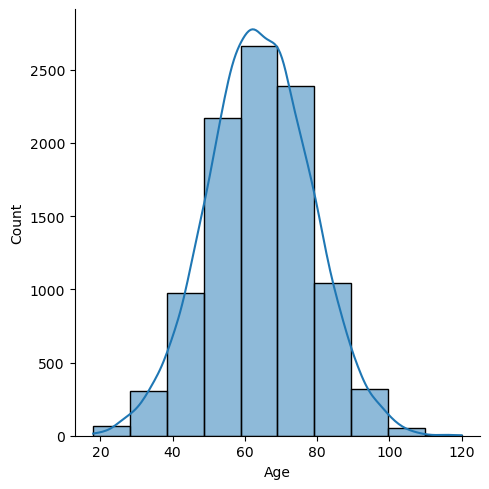

In [124]:
# Distribution plot of 'Age' 
sns.displot(df_final['Age'], kde = True, bins = 10)
plt.show()

In [123]:
# Descriptive statistics of 'Age' 
print(df_final['Age'].describe())
print(df_final['Age'].mode())

count    9994.000000
mean       64.059135
std        14.255801
min        18.000000
25%        54.000000
50%        64.000000
75%        74.000000
max       120.000000
Name: Age, dtype: float64
0    61
Name: Age, dtype: int64


- 'Age' analysis 

In the bell-shaped 'Age' distribution plot, we see that age can be well approximated by a normal distribution. This is confirmed by reviewing the descriptive statistics of the age column: mean, median, and mode are 64, 64, and 61 respectively. These three values are close in value, similar to perfectly normally distributed data where mean, median, and mode are all equal. 

It is important to note that this distribution does not follow the population distribution of the Singapore population, where the actual median age is 42. Hence, findings and inferences derived from this dataset must be extrapolated to the wider population with caution to biased conclusions. 

Sources: 
- https://www.statista.com/statistics/624913/singapore-population-by-age-group/
- https://www.singstat.gov.sg/find-data/search-by-theme/population/population-and-population-structure/latest-data

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


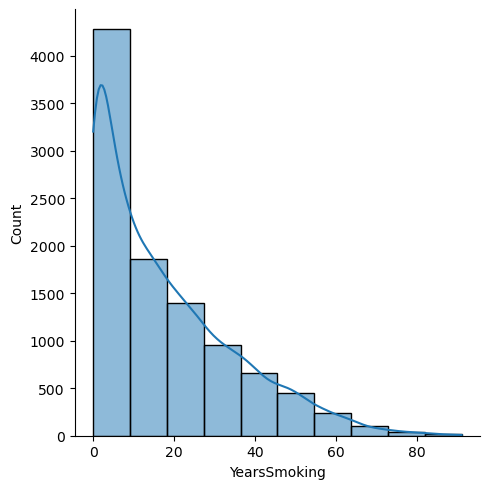

In [112]:
# Distribution plot of 'YearsSmoking' 
sns.displot(df_final['YearsSmoking'], kde = True, bins = 10)
plt.show()

In [125]:
# Descriptive statistics of 'YearsSmoking' 
print(df_final['YearsSmoking'].describe())
print(df_final['YearsSmoking'].mode())

count    9994.000000
mean       17.653892
std        17.056571
min         0.000000
25%         4.000000
50%        13.000000
75%        27.000000
max        91.000000
Name: YearsSmoking, dtype: float64
0    0
Name: YearsSmoking, dtype: int64


- 'YearsSmoking' Analysis 

The distribution plot above shows that the data for 'YearsSmoking' is right-skewed. This indicates that there are relatively few individuals who smoke for a very large number of years, compared to the majority of individuals. The descriptive statistics further show us that the mean of 18 is pulled in the direction of the skew (to the right), making it larger than the median of 13. 

While the median and mean are 13 and 18 respectively, the mode for number of years smoking is zero. Within the context of Singapore, this could imply the effectiveness of anti-smoking campaigns which have been established due to known links between smoking and lung cancer occurence. 

Source: https://www.healthhub.sg/programmes/iquit

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


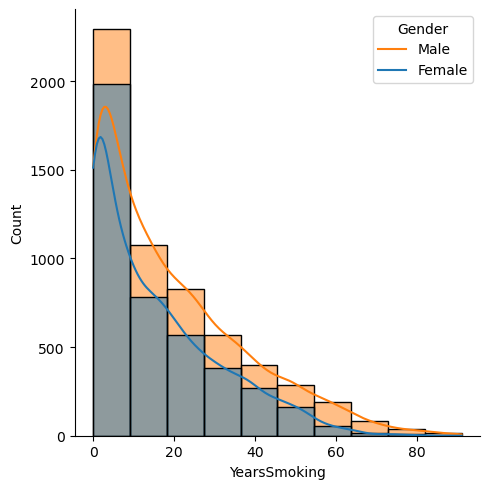

In [134]:
# Distribution plot of 'YearsSmoking' based on gender
sns.displot(df_final, x = 'YearsSmoking', kde = True, bins = 10, hue = 'Male', legend = False)
plt.legend(title = 'Gender', labels = ['Male', 'Female'])
plt.show()

In [146]:
df_final['Male'].value_counts() 

Male
1    5775
0    4219
Name: count, dtype: int64

- 'YearsSmoking' and Gender 

The distribution plot above has an added layer of complexity, plotting the distribution of 'YearsSmoking' based on the gender of the individual. The plot shows that while the shape of the distribution for both male and female smokers is the same, there are less female smokers overall in every bin range of 'YearsSmoking'. This is inline with research studies in Singapore, which found that 27.1% of men are smokers while only 5.3% of women are smokers. 

It is important to note that while the distribution appears to show that less women smoke, using df_final['Male'].value_counts() shows us that there are 5775 males in the dataset and only 4219 females, hence male smokers may be overrepresented. 

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6803088/#:~:text=Prevalence%20of%20smoking%20and%20nicotine%20dependence,-Table%201%20shows&text=Among%20the%20population%2C%2016.1%25%20were,among%20women%20it%20was%205.3%25.

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


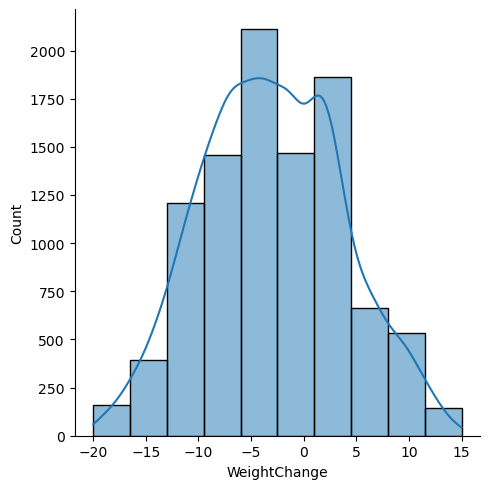

In [126]:
# Distribution plot of 'WeightChange'
sns.displot(df_final['WeightChange'], kde = True, bins = 10)
plt.show()

In [138]:
# Descriptive statistics of 'WeightChange' 
print(df_final['WeightChange'].describe())
print(df_final['WeightChange'].mode())

count    9994.000000
mean       -2.978587
std         6.713635
min       -20.000000
25%        -8.000000
50%        -3.000000
75%         2.000000
max        15.000000
Name: WeightChange, dtype: float64
0   -1
Name: WeightChange, dtype: int64


- 'WeightChange' Analysis 

This distribution plot shows us that the central tendency is for individual weight to decrease by 3 (median: -3), whilst the mean weight loss is also -3. However, most commonly, individuals in the dataset are losing 1 unit of weight (mode: -1). This does not reflect real world data, which indicates that 39% of Singaporeans have gained weight. This dissonance between the dataset and real world data could be attributed to where this data was collected from: perhaps in healthcare settings, where individuals are already losing weight due to other underlying health issues. 

Source: https://www.ipsos.com/en-sg/nearly-4-10-singaporeans-report-gaining-weight-pandemic-more-so-among-young-adults#:~:text=22%25%20of%20Singaporeans%20say%20they,weight%20loss%20being%204.9%20kg.

- Categorical plots 

After creating the distribution plots, we can use all three continuous variables to understand their relationship with categorical variables using categorical plots. These box and whisker plots allow us to create multiple plots across different values of categorical variables, easily identifying the median, quartiles, and outliers. 

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


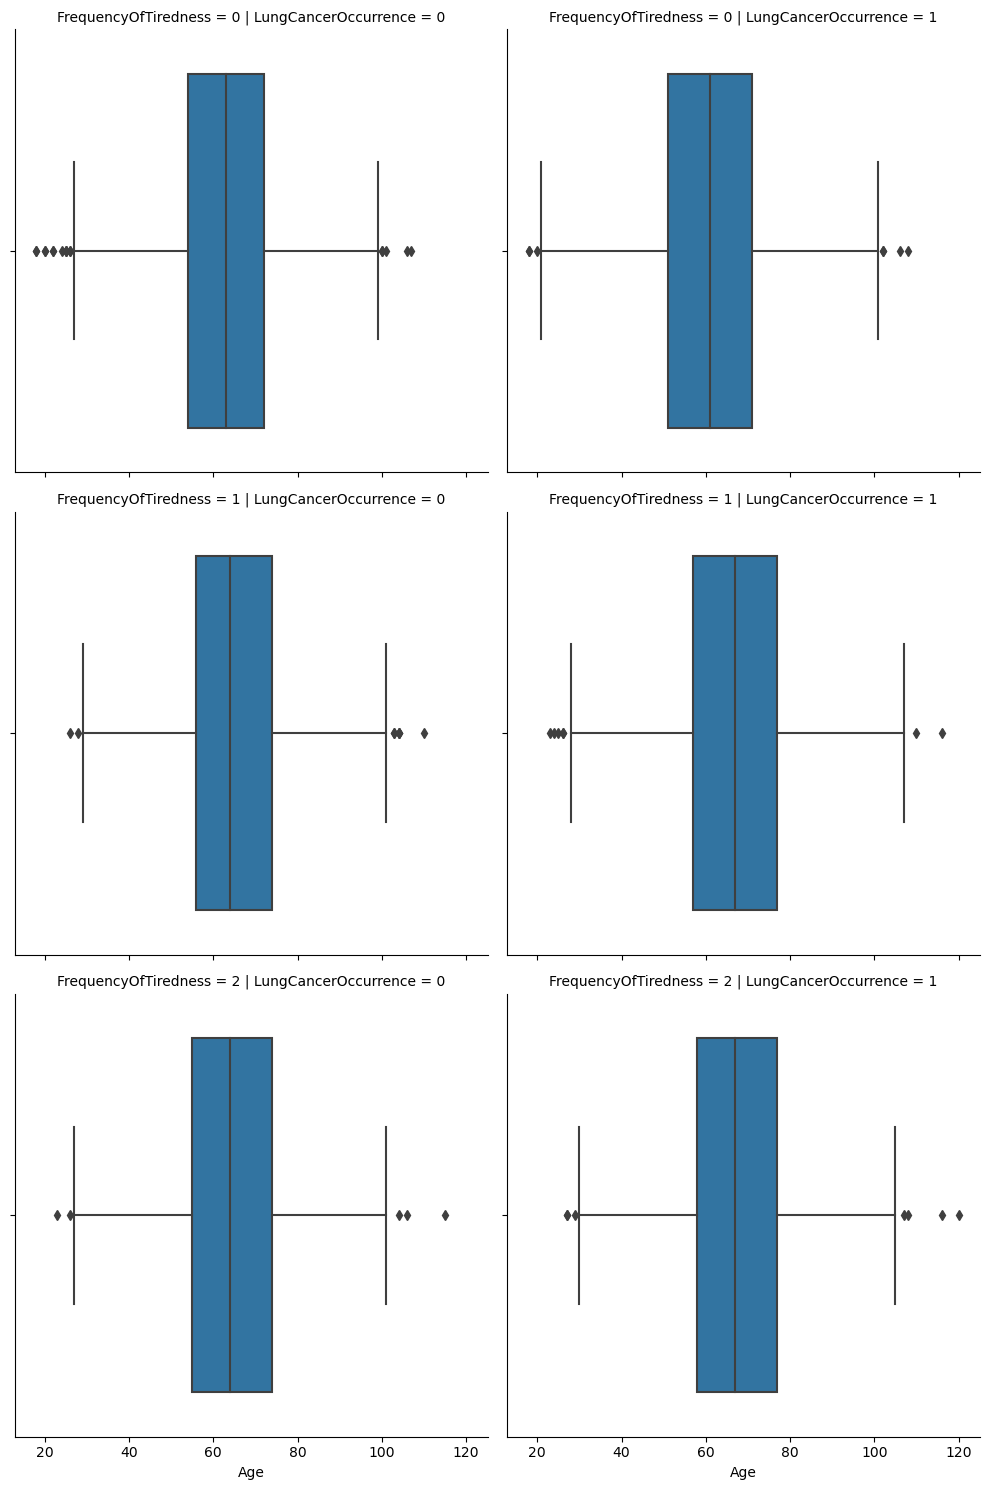

In [153]:
# Categorical plot of 'Age' against 'FrequencyOfTiredness' and 'LungCancerOccurrence'
sns.catplot(x = 'Age', data = df_final, col = 'LungCancerOccurrence', row = 'FrequencyOfTiredness', kind = 'box')
plt.show()

- 'Age' against 'FrequencyOfTiredness' and 'LungCancerOccurrence' Analysis 

These plots show that the median age when 'FrequencyOfTiredness' is lowest (0) is less than the median age for when 'FrequencyOfTiredness' is higher (1 or 2). This is to be expected as younger individuals may have more energy and report feeling less tired. In the last two rows of the categorical plots, we observe median age being higher when lung cancer is observed ('LungCancerOccurrence' = 1). This suggests that individuals at older ages who report feeling a higher frequency of tiredness are more likely to be diagnosed with lung cancer. 

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


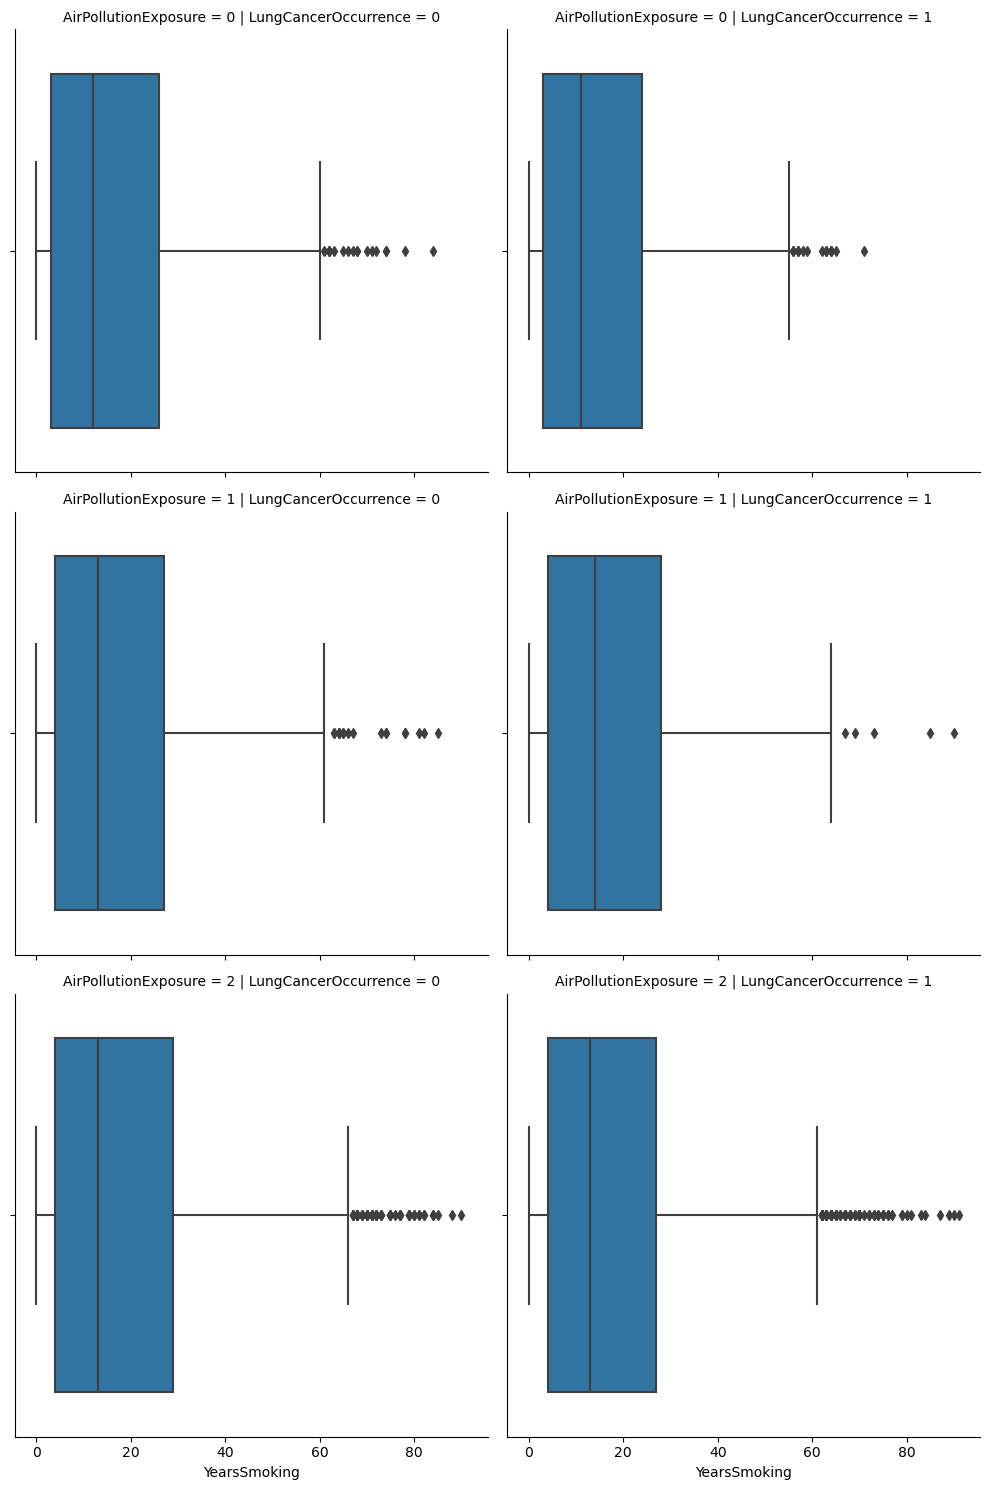

In [157]:
# Categorical plot of 'YearsSmoking' against 'AirPollutionExposure' and 'LungCancerOccurrence'
sns.catplot(x = 'YearsSmoking', data = df_final, col = 'LungCancerOccurrence', row = 'AirPollutionExposure', kind = 'box')
plt.show()

- 'YearsSmoking' against 'AirPollutionExposure' and 'LungCancerOccurrence' Analysis 

In the categorical plots above, we notice that outliers are more extreme in terms of frequency and distance from the box plot whisker threshold when 'AirPollutionExposure' is the highest, at 2. All of the outliers are above the upper threshold, suggesting that individuals exposed to higher levels of air pollution may be more prone to being smokers for a longer period of time. In a Singaporean context, this may mean that individuals who work or live in more polluted areas may be of lower socio-economic status and are likelier to be smokers. 

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


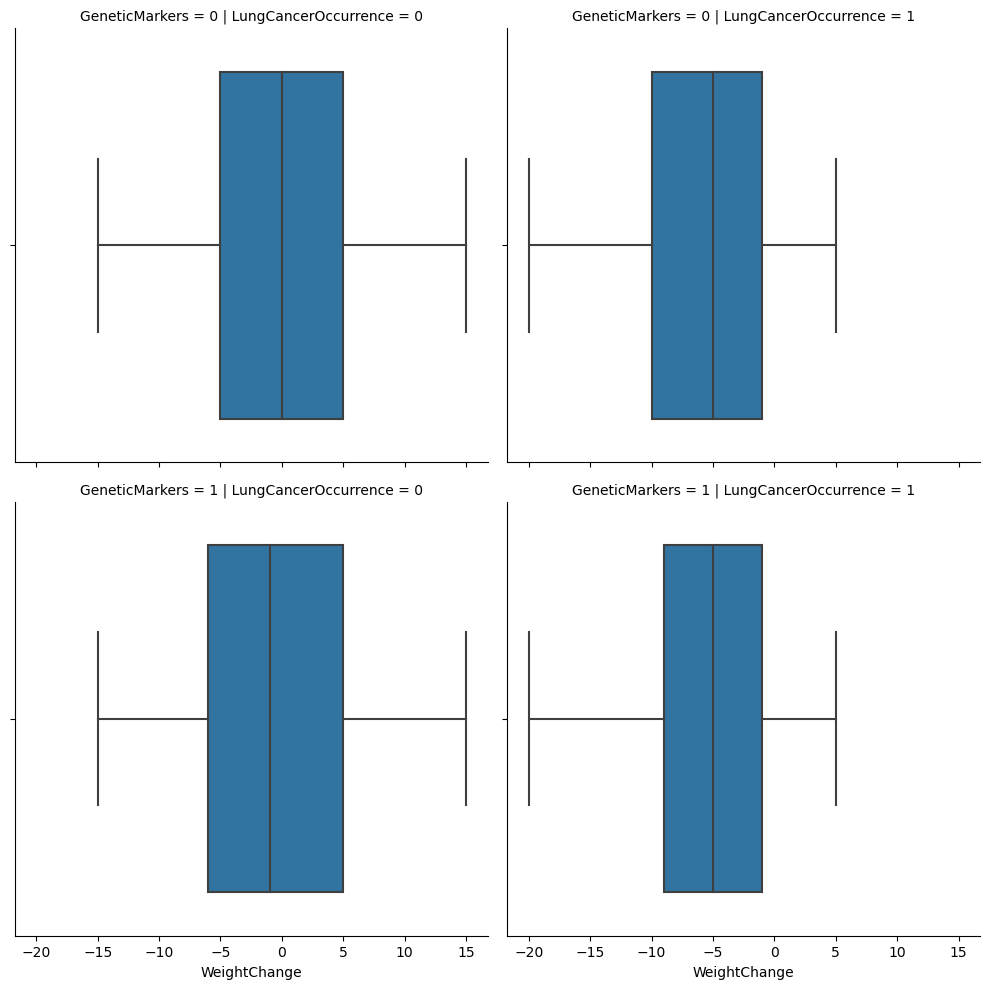

In [171]:
# Categorical plot of 'WeightChange' against 'GeneticMarkers' and 'LungCancerOccurrence'
sns.catplot(x = 'WeightChange', data = df_final, col = 'LungCancerOccurrence', row = 'GeneticMarkers', kind = 'box')
plt.show()

- 'WeightChange' against 'GeneticMarkers' and 'LungCancerOccurrence' Analysis 

These categorical plots suggests that the median weight change for those diagnosed with lung cancer is -5 regardless of whether an individual has genetic markers. Furthermore, the median weight change for those who are not diagnosed with lung cancer is zero, hence a stable weight (no weight loss or gain) may be a good indicator of a healthy, cancer-free individual. 

Additionally, for individuals diagnosed with lung cancer ('LungCancerOccurrence' = 1), the 75th percentile of weight change is approximately 10 units from the median, as opposed to 15 units from the median when 'LungCancerOccurrence' = 0. This further suggests that those diagnosed with lung cancer may struggle to maintain or gain weight, and are likelier to lose weight. 

- Scatter plots 

These plots can be used to understand the relationship between two continuous numeric variables, namely 'Age' and 'Weight Change'. Instead of choosing to plot 'YearsSmoking', the two plots are plotted in parallel, one containing data for non-smokers, and the other containing data for smokers. 

C:\Users\joyie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


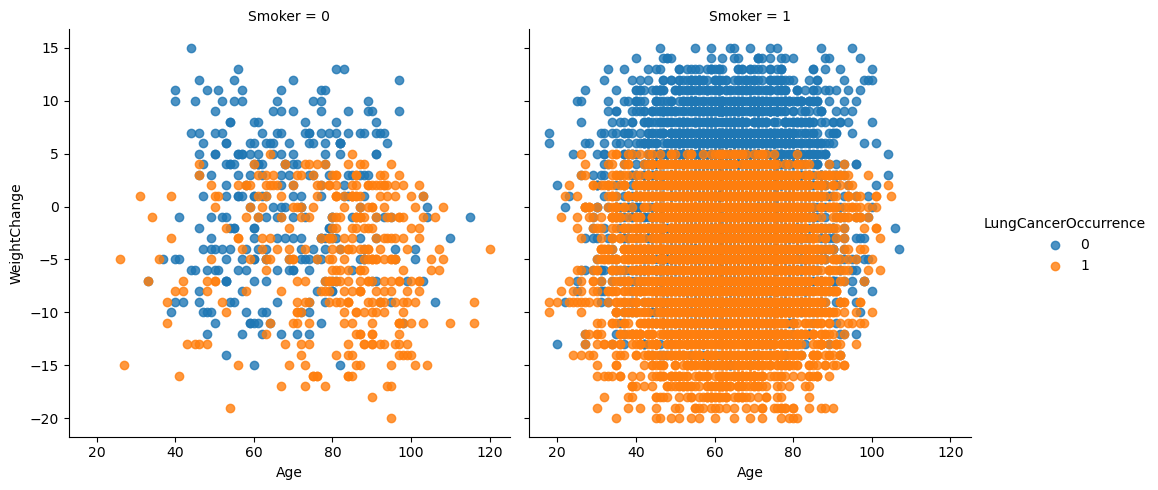

In [185]:
# Scatter plot of 'Age' against 'WeightChange'
sns.lmplot(data = df_final, x = 'Age', y = 'WeightChange', hue = 'LungCancerOccurrence', col = 'Smoker', fit_reg = False)
plt.show()

- 'Age' against 'WeightChange' Analysis 

These two scatter plots represent entries for non-smokers and smokers respectively, plotting 'Age' against 'WeightChange'. Both plots show minimal correlation between age and change in weight. However, the first plot shows that lung cancer (represented by the orange hue) occurs more frequently in older individuals who are non-smokers. Conversely, lung cancer diagnoses exist fairly evenly across all ages of smokers, pointing to a correlation between being a smoker (as opposed to number of years smoking) and having lung cancer. It also reinforces previous inferences that individuals who have weight loss are more likely to be diagnosed with lung cancer. 

## 7. Conclusion 

With the inferences drawn from data visualisation section, we have identified relationships between both continuous and numeric values. This will inform how we approach building our machine learning models. 